<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/%5BTensorflow%5DTransferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

import os
import zipfile
import random
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip = zipfile.ZipFile('/content/drive/MyDrive/DeepLearning/대구AI허브/dogs-vs-cats.zip', 'r')
zip.extractall('dogs-vs-cats')
zip.close()

In [4]:
os.makedirs('train/dogs/')
os.makedirs('train/cats/')
os.makedirs('test/dogs/')
os.makedirs('test/cats/')

In [5]:
filenames = os.listdir('dogs-vs-cats')
random.seed(4)
testRatio = 0.2
numofData = 1200
for i, filename in enumerate(filenames):
    if i>=numofData:
        break
    src = 'dogs-vs-cats/' + filename
    if random.random() > testRatio:
        subDir = 'train/'
    else:
        subDir = 'test/'
    if filename.startswith('dog'):
        labelDir = 'dogs/'
    else:
        labelDir = 'cats/'
    shutil.move(src, subDir + labelDir + filename)

In [6]:
print(len(os.listdir('train/dogs')))
print(len(os.listdir('train/cats')))
print(len(os.listdir('test/dogs')))
print(len(os.listdir('test/cats')))

487
462
134
117


In [7]:
datagen = image.ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(
                  'train/',
                  target_size=(224, 224),
                  batch_size=64,
                  class_mode='binary')

validation_generator = datagen.flow_from_directory(
                  'test/',
                  target_size=(224, 224),
                  batch_size=64,
                  class_mode='binary')

Found 949 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import resnet50 

resnet_bot = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)) # top: fc layers
resnet_bot.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [9]:
for layer in resnet_bot.layers:
    layer.trainable = False

In [10]:
model = tf.keras.Sequential()
model.add(resnet_bot)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4096)              411045888 
                                                                 
 dense_1 (Dense)             (None, 2)                 8194      
                                                                 
Total params: 434,641,794
Trainable params: 411,054,082
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
hist = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs = 20
)

Epoch 1/20
15/15 [==============================] - 21s 547ms/step - loss: 38.4384 - accuracy: 0.5269 - val_loss: 6.2069 - val_accuracy: 0.4701
Epoch 2/20
15/15 [==============================] - 5s 339ms/step - loss: 2.0888 - accuracy: 0.5511 - val_loss: 1.1473 - val_accuracy: 0.5339
Epoch 3/20
15/15 [==============================] - 5s 341ms/step - loss: 0.9610 - accuracy: 0.5532 - val_loss: 0.6812 - val_accuracy: 0.5896
Epoch 4/20
15/15 [==============================] - 5s 343ms/step - loss: 0.7064 - accuracy: 0.6217 - val_loss: 0.8931 - val_accuracy: 0.5458
Epoch 5/20
15/15 [==============================] - 5s 343ms/step - loss: 0.7054 - accuracy: 0.6038 - val_loss: 0.6022 - val_accuracy: 0.6972
Epoch 6/20
15/15 [==============================] - 5s 341ms/step - loss: 0.6355 - accuracy: 0.6386 - val_loss: 0.7824 - val_accuracy: 0.5737
Epoch 7/20
15/15 [==============================] - 5s 344ms/step - loss: 0.6112 - accuracy: 0.6449 - val_loss: 0.6338 - val_accuracy: 0.6414
Epoc

In [18]:
model.evaluate(validation_generator, steps=len(validation_generator), verbose=0)

[0.5952354073524475, 0.717131495475769]

cat: 0.69, dog: 0.31


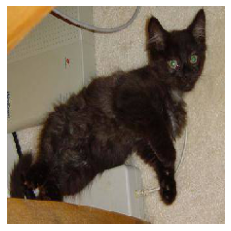

In [20]:
testImage = tf.keras.preprocessing.image.load_img('/content/test/cats/cat.10165.jpg', target_size=(224, 224))
imageArr = np.array(testImage)
imageArr = imageArr/255
imageArr = imageArr.reshape(-1, 224, 224, 3)
pred = model.predict(imageArr)
print(f'cat: {pred[0,0]:.2f}, dog: {pred[0,1]:.2f}')
imageArr = imageArr.reshape(224,224,3)
plt.imshow(imageArr)
plt.axis('off')
plt.show()

In [21]:
from tensorflow.keras.applications import vgg19

vgg_bot = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg_bot.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [22]:
for layer in vgg_bot.layers:
    layer.trainable = False 

In [23]:
model = tf.keras.Sequential()
model.add(vgg_bot)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 26,447,682
Trainable params: 6,423,298
Non-trainable params: 20,024,384
_________________________________________________________________


In [24]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [25]:
hist = model.fit(
    train_generator, 
    validation_data = validation_generator, 
    epochs=20
)

Epoch 1/20
15/15 [==============================] - 20s 1s/step - loss: 4.4202 - accuracy: 0.5237 - val_loss: 0.6936 - val_accuracy: 0.5657
Epoch 2/20
15/15 [==============================] - 7s 448ms/step - loss: 0.5301 - accuracy: 0.7123 - val_loss: 0.4190 - val_accuracy: 0.8048
Epoch 3/20
15/15 [==============================] - 7s 454ms/step - loss: 0.2835 - accuracy: 0.8936 - val_loss: 0.3699 - val_accuracy: 0.8406
Epoch 4/20
15/15 [==============================] - 7s 454ms/step - loss: 0.2225 - accuracy: 0.9273 - val_loss: 0.3380 - val_accuracy: 0.8446
Epoch 5/20
15/15 [==============================] - 7s 457ms/step - loss: 0.1804 - accuracy: 0.9536 - val_loss: 0.3273 - val_accuracy: 0.8446
Epoch 6/20
15/15 [==============================] - 7s 462ms/step - loss: 0.1519 - accuracy: 0.9642 - val_loss: 0.3278 - val_accuracy: 0.8406
Epoch 7/20
15/15 [==============================] - 7s 465ms/step - loss: 0.1278 - accuracy: 0.9737 - val_loss: 0.3268 - val_accuracy: 0.8367
Epoch 8/

In [31]:
model.evaluate(validation_generator, verbose=0)

[0.37546610832214355, 0.8565737009048462]

cat: 0.00, dog: 1.00


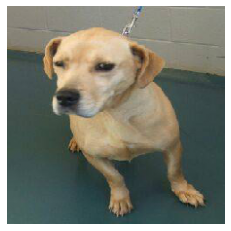

In [32]:
testImage = tf.keras.preprocessing.image.load_img('/content/test/dogs/dog.10143.jpg', target_size=(224, 224))
imageArr = np.array(testImage)
imageArr = imageArr/255
imageArr = imageArr.reshape(-1, 224, 224, 3)
pred = model.predict(imageArr)
print(f'cat: {pred[0,0]:.2f}, dog: {pred[0,1]:.2f}')
imageArr = imageArr.reshape(224,224,3)
plt.imshow(imageArr)
plt.axis('off')
plt.show()